In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

ngram_min, ngram_max = 4, 4

X, V = creer_X(liste_tags, ngram_min, ngram_max)

In [3]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import operator

In [48]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# ici, on récupère les vecteurs déjà calculés sans ceux du cluster poubelle

distortions = [] 
inertias = []  
K = range(2, 10)

for k in K: 
    print("%s clusters" % k)
    kmeanModel = creer_model_KM(k, X)
    
    dic_eff = effectifs_clusters(kmeanModel)
    print(dic_eff)
    
    # retirer le cluster le plus peuplé 
    predictions = kmeanModel.predict(X)
    nb_clus = k
    cluster_poub = -1
    if k > 1:
        cluster_poub = max(dic_eff.items(), key=operator.itemgetter(1))[0]
        nb_clus = k-1
    new_X = []
    for i in range(len(X)):
        if predictions[i] != cluster_poub:
            new_X.append(X[i])
            
    X_2 = np.array(new_X)
    kmeanModel2 = creer_model_KM((nb_clus), X_2)
    dic_eff = effectifs_clusters(kmeanModel2)
    print(dic_eff)
    
    distortions.append(sum(np.min(cdist(X_2, kmeanModel2.cluster_centers_, 
                    'euclidean'),axis=1)) / X_2.shape[0]) 
    inertias.append(kmeanModel2.inertia_)

2 clusters
{1: 1892, 0: 3793}
{0: 1892}
3 clusters
{0: 1626, 2: 1033, 1: 3026}
{0: 1635, 1: 1024}
4 clusters
{2: 1097, 1: 948, 3: 2618, 0: 1022}
{1: 1098, 2: 950, 0: 1019}
5 clusters
{0: 968, 3: 780, 2: 842, 4: 2208, 1: 887}
{0: 938, 1: 775, 2: 863, 3: 901}
6 clusters
{5: 486, 4: 792, 1: 762, 0: 2008, 2: 882, 3: 755}
{2: 494, 3: 765, 0: 777, 1: 880, 4: 761}
7 clusters
{1: 627, 2: 432, 0: 591, 4: 2077, 6: 837, 5: 482, 3: 639}
{4: 627, 0: 425, 3: 595, 2: 838, 1: 489, 5: 634}
8 clusters
{2: 559, 4: 398, 1: 679, 0: 1863, 3: 755, 6: 471, 5: 572, 7: 388}
{3: 552, 5: 414, 1: 647, 4: 757, 6: 484, 0: 572, 2: 396}
9 clusters
{2: 464, 6: 399, 1: 534, 3: 1948, 4: 491, 7: 490, 8: 653, 5: 455, 0: 251}
{0: 479, 6: 404, 4: 529, 5: 489, 2: 492, 3: 647, 7: 454, 1: 243}


In [55]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# ici, on recalcule les vecteurs en ayant supprimé les titres des articles du cluster poubelle

distortions = [] 
inertias = []  
K = range(1, 10)

for k in K: 
    print("%s clusters" % k)
    kmeanModel = creer_model_KM(k, X)
    
    dic_eff = effectifs_clusters(kmeanModel)
    print(dic_eff)
    
    # repérer le cluster le plus peuplé 
    predictions = kmeanModel.predict(X)
    nb_clus = k
    cluster_poub = -1
    if k > 1:
        cluster_poub = max(dic_eff.items(), key=operator.itemgetter(1))[0]
        nb_clus = k-1
    
    # préparer les nouvelles données à clusteriser
    new_tags = []
    for i in range(len(liste_tags)):
        if predictions[i] != cluster_poub:
            new_tags.append(liste_tags[i])
    
    X_2, V_2 = creer_X(new_tags, ngram_min, ngram_max)
    kmeanModel2 = creer_model_KM((nb_clus), X_2)
    dic_eff = effectifs_clusters(kmeanModel2)
    print(dic_eff)
    
    distortions.append(sum(np.min(cdist(X_2, kmeanModel2.cluster_centers_, 
                    'euclidean'),axis=1)) / X_2.shape[0]) 
    inertias.append(kmeanModel2.inertia_)

1 clusters
{0: 5685}
{0: 5685}
2 clusters
{1: 790, 0: 4895}


E:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


{0: 790}
3 clusters
{1: 786, 0: 4504, 2: 395}
{0: 787, 1: 394}
4 clusters
{3: 447, 0: 4253, 1: 525, 2: 460}
{2: 445, 0: 520, 1: 467}
5 clusters
{3: 408, 0: 3941, 4: 516, 1: 390, 2: 430}
{2: 399, 3: 522, 0: 376, 1: 447}
6 clusters
{4: 341, 0: 3966, 1: 347, 5: 329, 2: 403, 3: 299}
{4: 339, 1: 351, 2: 331, 0: 398, 3: 300}
7 clusters
{2: 345, 0: 3775, 6: 328, 4: 451, 3: 162, 5: 364, 1: 260}
{5: 344, 4: 338, 1: 624, 2: 162, 0: 168, 3: 274}
8 clusters
{0: 461, 4: 294, 1: 3286, 2: 301, 3: 465, 5: 306, 6: 284, 7: 288}
{2: 462, 6: 271, 3: 293, 0: 797, 1: 116, 5: 166, 4: 294}
9 clusters
{8: 287, 5: 262, 0: 3405, 4: 256, 3: 331, 1: 337, 2: 315, 7: 260, 6: 232}
{2: 282, 1: 259, 4: 245, 3: 366, 6: 368, 7: 288, 5: 254, 0: 218}


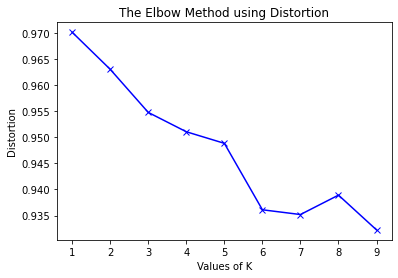

In [56]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

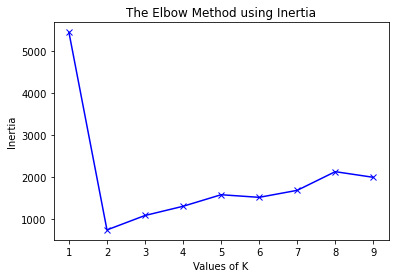

In [57]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()